In [154]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [131]:
url_2023 = "https://www.formula1.com/en/results.html/2023/races.html"
html_2023 = req.get(url_2023)

soup = bs(html_2023.content, "html5lib")

race_results_2023 = []

table = soup.find_all("tr")

for row in table:
    results = {}
    
    if row.select_one("td.dark.bold a") is not None:
        results["gp"] = row.select_one("td.dark.bold a").text.strip()
        
    if row.select_one("td.dark.bold span.uppercase.hide-for-desktop") is not None:
        results["driver"] = row.select_one("td.dark.bold span.uppercase.hide-for-desktop").text
        
    if row.select_one("td.semi-bold.uppercase") is not None:
        results["constructor"] = row.select_one("td.semi-bold.uppercase").text
    
    if results:
        race_results_2023.append(results)

print(race_results_2023)

[{'gp': 'Bahrain', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Saudi Arabia', 'driver': 'PER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Australia', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Azerbaijan', 'driver': 'PER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Miami', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Monaco', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Spain', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Canada', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Austria', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Great Britain', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Hungary', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Belgium', 'driver': 'VER', 'constructor': 'Red Bull Racing Honda RBPT'}, {'gp': 'Netherlan

In [135]:
# save results to csv file
filename = "race_results_2023.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.DictWriter(csvfile, ["gp", "driver", "constructor"])
    writer.writeheader()
    
    for result in race_results_2023:
        writer.writerow(result)


In [140]:
# experimenting with pandas library
df = pd.DataFrame(race_results_2023)
print(df)

               gp driver                 constructor
0         Bahrain    VER  Red Bull Racing Honda RBPT
1    Saudi Arabia    PER  Red Bull Racing Honda RBPT
2       Australia    VER  Red Bull Racing Honda RBPT
3      Azerbaijan    PER  Red Bull Racing Honda RBPT
4           Miami    VER  Red Bull Racing Honda RBPT
5          Monaco    VER  Red Bull Racing Honda RBPT
6           Spain    VER  Red Bull Racing Honda RBPT
7          Canada    VER  Red Bull Racing Honda RBPT
8         Austria    VER  Red Bull Racing Honda RBPT
9   Great Britain    VER  Red Bull Racing Honda RBPT
10        Hungary    VER  Red Bull Racing Honda RBPT
11        Belgium    VER  Red Bull Racing Honda RBPT
12    Netherlands    VER  Red Bull Racing Honda RBPT
13          Italy    VER  Red Bull Racing Honda RBPT
14      Singapore    SAI                     Ferrari
15          Japan    VER  Red Bull Racing Honda RBPT
16          Qatar    VER  Red Bull Racing Honda RBPT
17  United States    VER  Red Bull Racing Hond

In [141]:
# Shortening Red Bull Racing Honda RBPT to Red Bull

correction = {"Red Bull Racing Honda RBPT": "Red Bull"}

df["constructor"] = df["constructor"].replace(correction)

print(df)

               gp driver constructor
0         Bahrain    VER    Red Bull
1    Saudi Arabia    PER    Red Bull
2       Australia    VER    Red Bull
3      Azerbaijan    PER    Red Bull
4           Miami    VER    Red Bull
5          Monaco    VER    Red Bull
6           Spain    VER    Red Bull
7          Canada    VER    Red Bull
8         Austria    VER    Red Bull
9   Great Britain    VER    Red Bull
10        Hungary    VER    Red Bull
11        Belgium    VER    Red Bull
12    Netherlands    VER    Red Bull
13          Italy    VER    Red Bull
14      Singapore    SAI     Ferrari
15          Japan    VER    Red Bull
16          Qatar    VER    Red Bull
17  United States    VER    Red Bull
18         Mexico    VER    Red Bull
19         Brazil    VER    Red Bull
20      Las Vegas    VER    Red Bull



=== CONSTRUCTOR WINS ===
{'Red Bull': 20, 'Ferrari': 1}


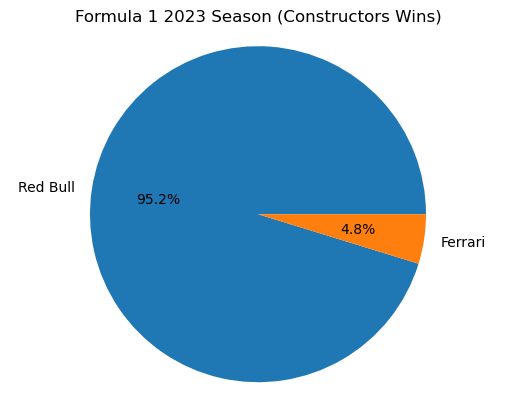

In [186]:
# Visualize the data
# num_of_races = len(df)
# print(num_of_races)

print("\n=== CONSTRUCTOR WINS ===")
num_of_constructor_wins = df["constructor"].value_counts()
print(dict(num_of_constructor_wins))

# print("\n=== DRIVER WINS ===")
# num_of_driver_wins = df["driver"].value_counts()
# print(num_of_driver_wins)

my_labels = list(num_of_constructor_wins.keys())

data = list(num_of_constructor_wins[label] for label in my_labels)

plt.pie(data, labels=my_labels, autopct="%.1f%%")

plt.title("Formula 1 2023 Season (Constructors Wins)")
plt.axis("equal")

plt.show()